In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import *
from matplotlib.cm import jet
import pandas as pd

plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["font.size"] = 20
plt.style.use(["dark_background"])

# plt.rcParams.keys()

# Importing the data, part b

y = columns: y_0, y_1,...,y_15
Y = rows: Y_0, Y_1,...,Y_1000
A = (Y_0, Y_1, Y_2,...,Y_1000)

In [2]:
def data_loader():
    samples = pd.read_csv("csv-map/samples.csv", delimiter=",")
    train_data = pd.read_csv("csv-map/train_ts.csv", delimiter=",")
    theta = samples.to_numpy()
    X = train_data.to_numpy()
    return X, theta 

X, theta = data_loader()
X.shape, theta.shape

((9999, 201), (9999, 15))

$\mathbf{X}$ is the training data $(9999, 201)$ and $\mathbf{\theta}$ is the targets $(9999,15)$.
Our goal is to find the parameters $\mathbf{W}$, a $(15, 201)$ matrix such that the $l_2$-norm is minimized.\
Let's try with least-squares-method for the following equation:
$$\mathbf{X W} = \mathbf{\theta}$$
We get \
$$
\mathbf{W} = (\mathbf{X^T X})^{-1} \mathbf{X^T\theta}$$

## Exploring the data

In [3]:
alpha_a, alpha_ap, alpha_r, alpha_rp, beta_a, beta_r, delta_ma, delta_mr, delta_a, delta_r, gamma_a, gamma_r, gamma_c, theta_a, theta_r = theta.T

(Text(0, 0.5, 'uniform sample range'), Text(0.5, 0, 'sample size'))

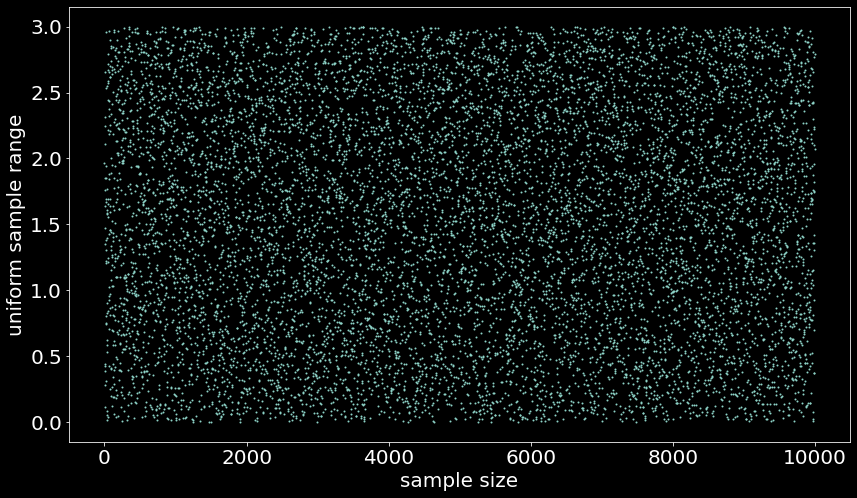

In [4]:
plt.plot(gamma_c, "o", ms=1)
plt.ylabel("uniform sample range"), plt.xlabel("sample size")

## Results from different runs, part b

(Text(0.5, 0, 'time steps'), Text(0, 0.5, 'quantity of the protein'))

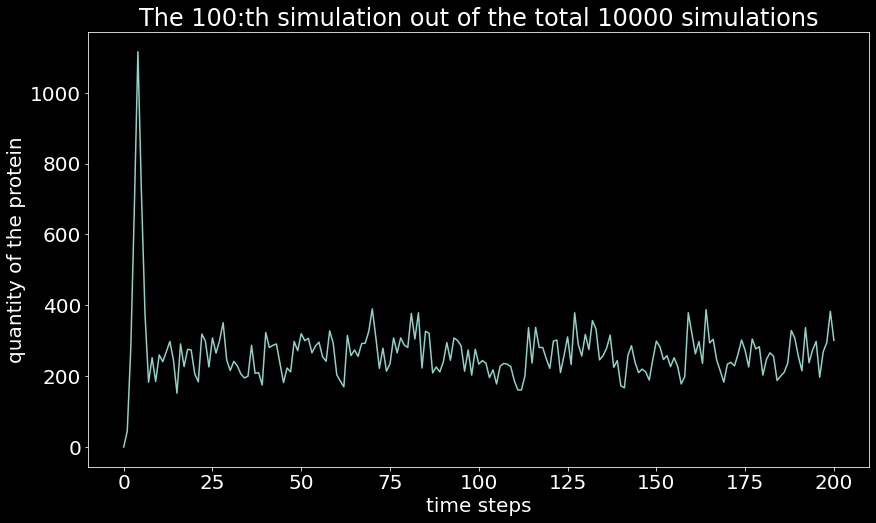

In [5]:
i = 100
plt.plot(X[i])
plt.title(f"The {i}:th simulation out of the total 10000 simulations")
plt.xlabel("time steps"), plt.ylabel("quantity of the protein")

In [6]:
print("condition number:", cond(X).round(0)) 

condition number: inf


# Solving for the parameters, part c

In [7]:
W_normal = inv(X.T @ X) @ X.T @ theta

LinAlgError: Singular matrix

In [8]:
Q, R = qr(X, mode="reduced") 
Q.shape, R.shape

((9999, 201), (201, 201))

In [9]:
print("condition number with QR:", cond(R).round(0))

condition number with QR: inf


Solving $\omega$ with QR-factorization

In [10]:
W_pinv = pinv(X)@theta
W_pinv.shape

(201, 15)

## plotting the value dependencies of each parameter

Text(0, 0.5, 'magnitude of the parameters')

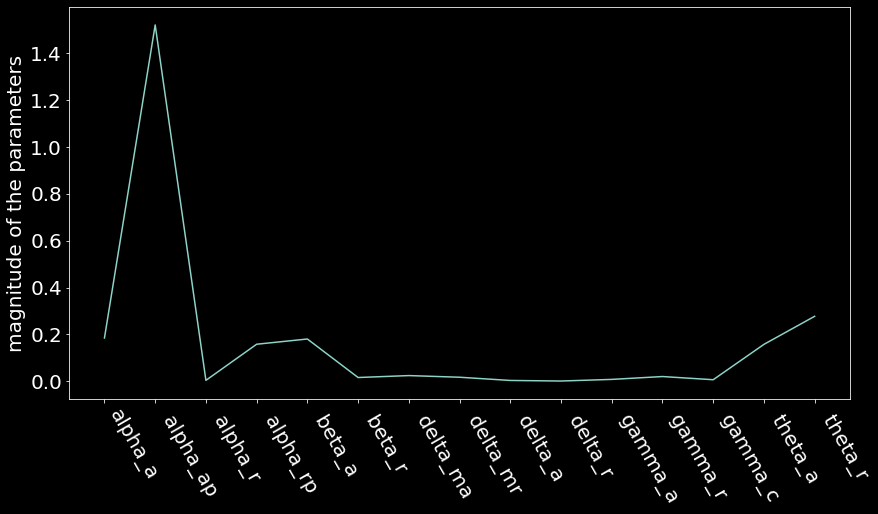

In [11]:
labels = "alpha_a, alpha_ap, alpha_r, alpha_rp, beta_a, beta_r, delta_ma, delta_mr, delta_a, delta_r, gamma_a, gamma_r, gamma_c, theta_a, theta_r"
parameter_labels = [word for word in labels.split(sep=",")]

fig, ax = plt.subplots(figsize=(14, 8))

j = np.random.choice(range(14)) # choose between 0 - 14
ax.plot(parameter_labels, W_pinv[j]) 
fig.autofmt_xdate(rotation=-60, ha="left")
ax.set_ylabel("magnitude of the parameters")

## plotting the time evolution of each parameter

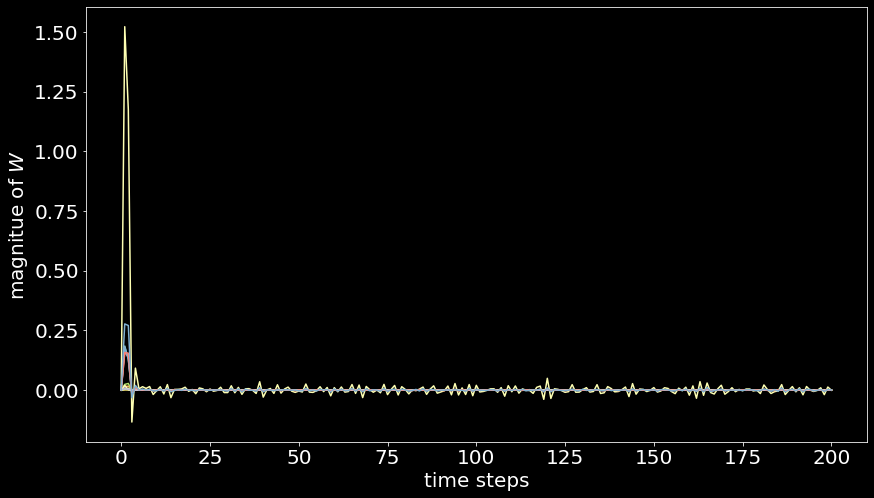

In [12]:
[plt.plot(W_pinv[:,i], label=f"{parameter_labels[i]}") 
 for i in range(15)
] 
#plt.legend()
plt.xlabel("time steps"), plt.ylabel("magnitue of $W$")
plt.savefig("magnitude of W w.r.t time.png")

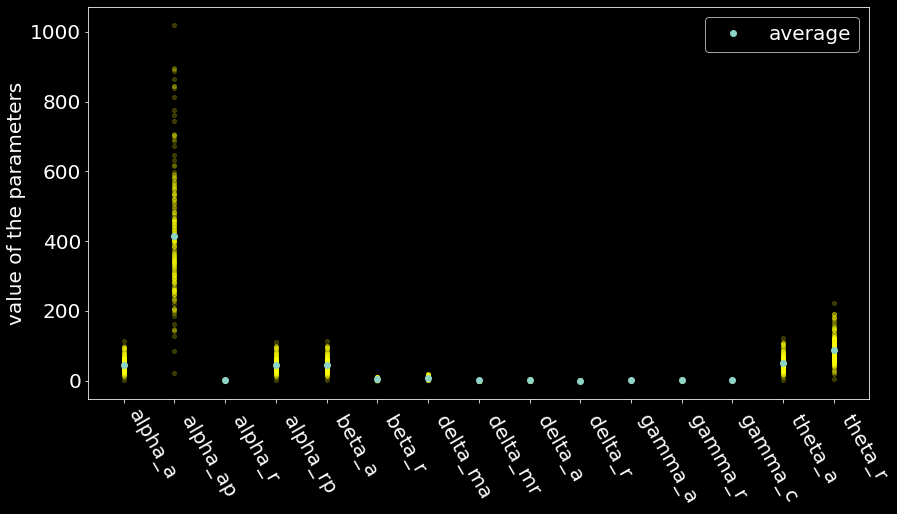

In [14]:
fig, ax = plt.subplots()
labels = "alpha_a, alpha_ap, alpha_r, alpha_rp, beta_a, beta_r, delta_ma, delta_mr, delta_a, delta_r, gamma_a, gamma_r, gamma_c, theta_a, theta_r"
parameter_labels = [word for word in labels.split(sep=",")]
theta_pred = X@W_pinv
for i in range(1, 201): 
    ax.plot(theta_pred[i], ".", color="yellow", ms=8, alpha=0.2)
ax.plot(parameter_labels, theta_pred.mean(0), "o", lw=3, label="average")    
fig.autofmt_xdate(rotation=-60, ha="left")
ax.set_ylabel("value of the parameters")
ax.legend()
fig.savefig("Distribution of the parameters w.r.t time.png")

In [15]:
df = pd.DataFrame(np.round(theta_pred.mean(0), 6), index=parameter_labels)
#df.to_csv("average values for the parameters.csv")
df#.to_numpy().flatten()

,0
alpha_a,45.817546
alpha_ap,414.340354
alpha_r,0.876592
alpha_rp,45.909409
beta_a,45.761362
beta_r,5.076244
delta_ma,8.216416
delta_mr,0.765000
delta_a,1.246021
delta_r,0.240904


# Comparing the fit against the trainning data, part d

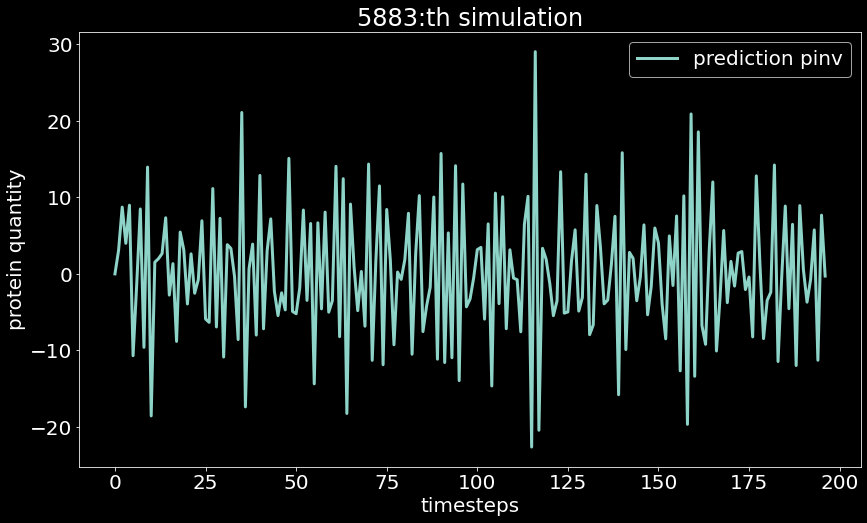

In [75]:
def alog(x):
    return np.log(1 + np.abs(x))
    
# for _ in range(10):
i = np.random.choice(range(10000))
plt.title(f"{i}:th simulation")
C_pred = theta[i]@W_pinv.T
C_pred_filtered = C_pred[ np.abs(C_pred) < 40] # with peaks removed
# plt.plot(X[i], label="data", color="green", lw=3)
plt.plot(C_pred_filtered, "-", lw=3, label="prediction pinv")
plt.xlabel("timesteps"), plt.ylabel("protein quantity")
plt.legend()
# plt.savefig(f"figures for part d\simulation number {i}.png");

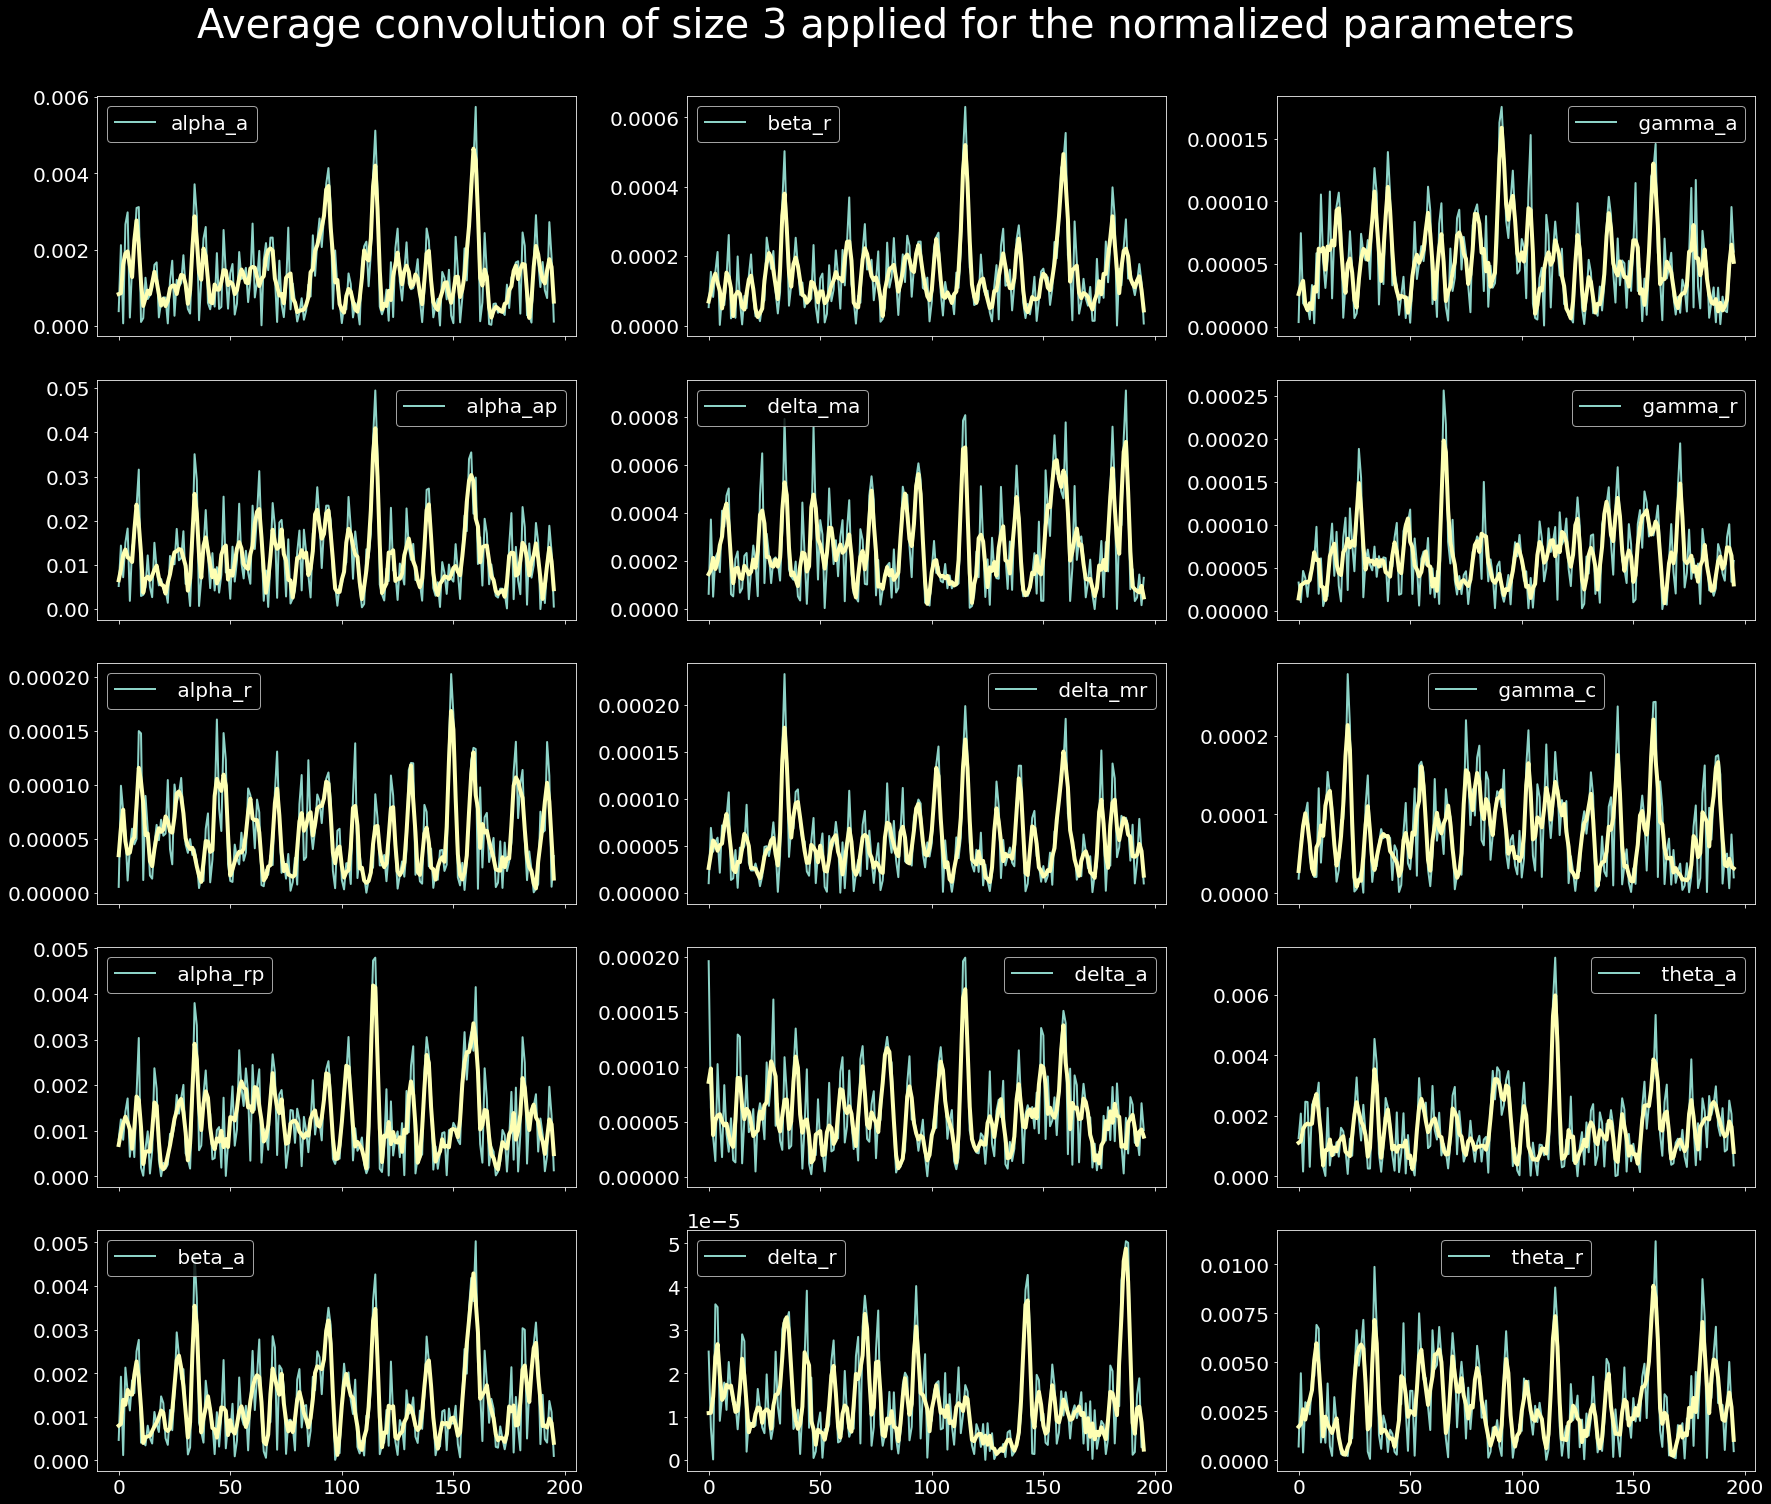

In [216]:
fig, ax = plt.subplots(5, 3, figsize=(5*5, 3*7), sharex=True, sharey=False, tight_layout=True)
W_pinv_filtered = W_pinv[5:]
W_pinv_norm = np.abs(W_pinv_filtered) #/ np.mean(np.abs(W_pinv_filtered), axis=0, keepdims=True) # nomralized parameters w.r.t. time

title = f"Average convolution of size {kernel_size} applied for the normalized parameters"
fig.suptitle(title, fontsize=40, y=1)
k = 0
for j in range(3):
    for i in range(5):
        average_filter = np.ones(kernel_size) / kernel_size
        ax[i,j].plot(W_pinv_norm[:,k], lw=2, label=f"{parameter_labels[k]}")
        ax[i,j].plot(np.convolve(W_pinv_norm[:,k], average_filter, "same"), lw=4)
        ax[i,j].legend()
        k += 1

plt.savefig(title + ".png")

In [87]:
np.linalg.norm(W_pinv, axis=1, keepdims=True).shape

(201, 1)

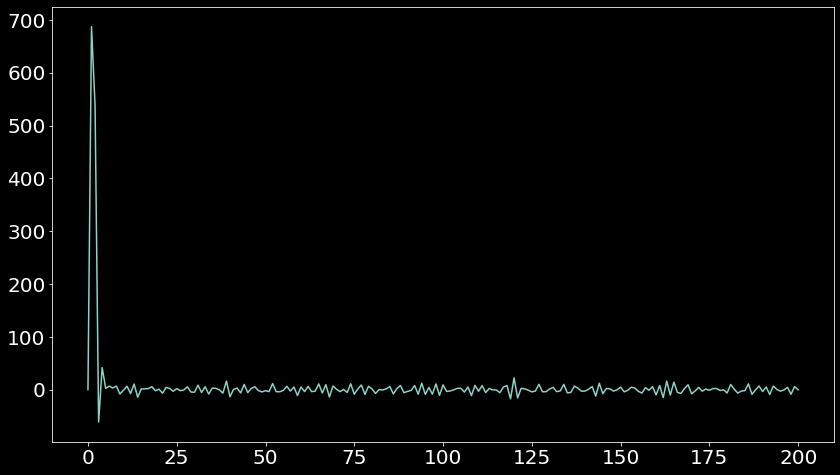

In [58]:
X_pred = W_pinv @ np.array([])#theta_pred.mean(0)
plt.plot(X_pred)